In [37]:
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = (30, 30)

df = pd.read_csv('./winequality/winequality-red.csv', encoding='cp1251', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']
print('Shape - {}\nColumns - {}'.format(df.shape, df.columns))


Shape - (1599, 12)
Columns - Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [38]:
from sklearn.preprocessing import MinMaxScaler

data = pd.DataFrame(MinMaxScaler().fit_transform(df.loc[:, 'fixed acidity': 'alcohol']), columns=X.columns)
data.insert(len(data.columns), 'quality', df.quality.values)

In [112]:
import matplotlib.pyplot as plt
import numpy as np

cmap = sns.cubehelix_palette(rot=-.4, as_cmap=True)
example = df.loc[df.chlorides < 0.15]
example = example.loc[df.chlorides > 0.04]

# print(len(example))

# sns.scatterplot(x='chlorides', y='quality', hue='quality', size='quality', sizes=(10, 200), data=example)
# sns.distplot(df.chlorides)
df['free sulfur dioxide'].sort_values().unique()

array([ 1. ,  2. ,  3. ,  4. ,  5. ,  5.5,  6. ,  7. ,  8. ,  9. , 10. ,
       11. , 12. , 13. , 14. , 15. , 16. , 17. , 18. , 19. , 20. , 21. ,
       22. , 23. , 24. , 25. , 26. , 27. , 28. , 29. , 30. , 31. , 32. ,
       33. , 34. , 35. , 36. , 37. , 37.5, 38. , 39. , 40. , 40.5, 41. ,
       42. , 43. , 45. , 46. , 47. , 48. , 50. , 51. , 52. , 53. , 54. ,
       55. , 57. , 66. , 68. , 72. ])

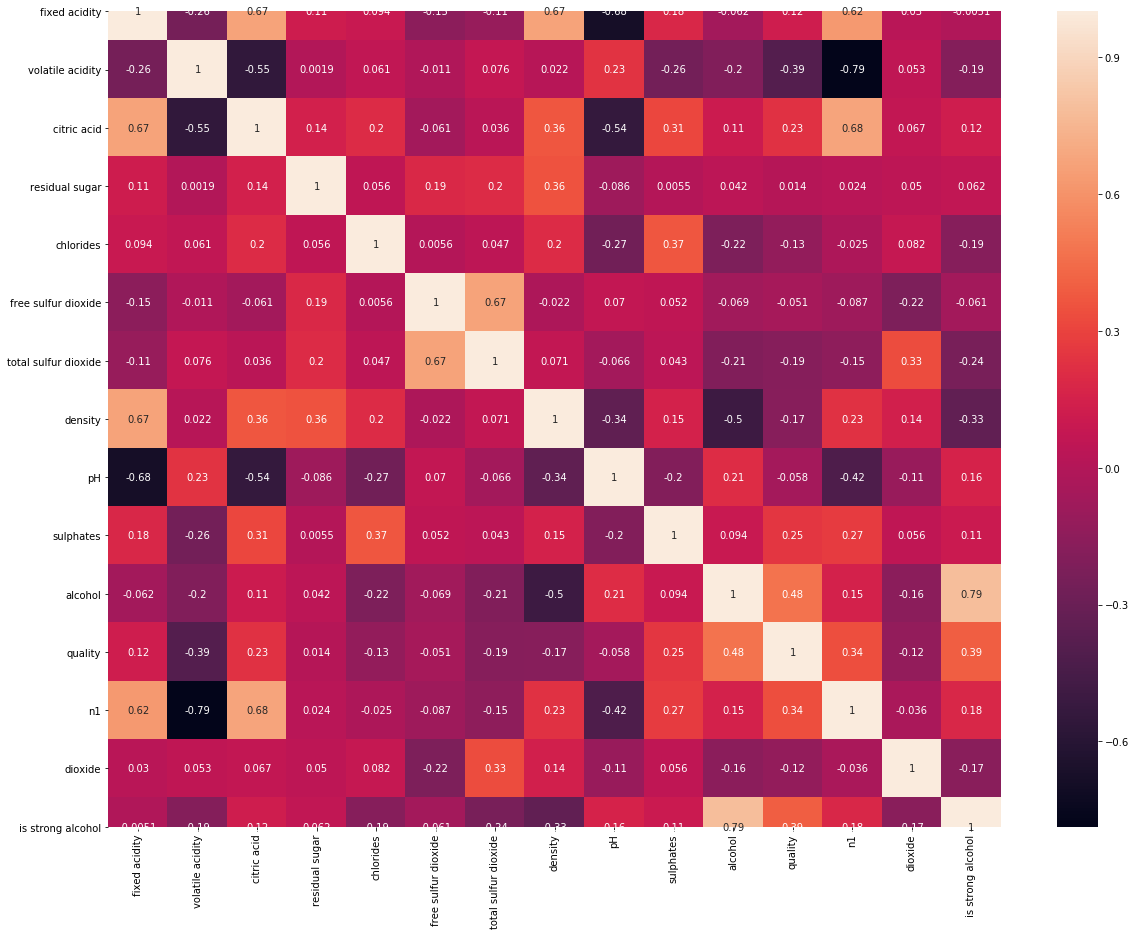

In [130]:
# sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', size='quality', sizes=(10, 200), data=example);
X_n = df.copy()
X_n['n1'] = X_n['fixed acidity']  / X_n['volatile acidity']
X_n['dioxide'] = X_n['total sulfur dioxide']  / X_n['free sulfur dioxide']
X_n['is strong alcohol'] = np.where(df['alcohol'] > 10, 1, 0)
sns.heatmap(X_n.corr(), annot=True);

(0.4842468500137329, 0.0)